# Imports

In [1]:
from os import path
from glob import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry
from sys import stdout
u = UnitRegistry()
Q_ = u.Quantity
default_data_dir = path.normpath(r'C:/Users/Lab/Google Drive/Documents/silicon photonics/SHG data share/SHG data')
%matplotlib inline

# Function definitions

In [3]:
def load_shg_wavelength_sweep(name='',data_dir=default_data_dir,verbose=False,
                     fpath=None,metadata=False,exact_name=False):
    if fpath:
        if verbose:
            print_statusline('Loading data from file: ' + path.basename(path.normpath(fpath)))
        data_npz = np.load(Path(fpath))
    else:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/'+ 'SHG_wavelength_sweep_' + name + '*'))
        latest_file = max(file_list,key=path.getctime)
        if verbose:
            print_statusline('Loading ' + name +' data from file: ' + path.basename(path.normpath(latest_file)))
        data_npz = np.load(latest_file)
    lm_meas = data_npz['lm_meas'] * u.nm
    V_P_24_trans = data_npz['V_P_24_trans'] * u.volt
    V_P_24_ref = data_npz['V_P_24_ref'] * u.volt
    V_R = data_npz['V_R'] * u.volt
    theta = data_npz['theta'] * u.volt
    try:
        lm_set = data_npz['lm_set'] * u.nm
        ds = {'lm_set':lm_set,
                'lm_meas':lm_meas,
                'V_P_24_trans':V_P_24_trans,
                'V_P_24_ref':V_P_24_ref,
                'V_R':V_R,
                'theta':theta}
    except:
        ds = {'lm_meas':lm_meas,
                'V_P_24_trans':V_P_24_trans,
                'V_P_24_ref':V_P_24_ref,
                'V_R':V_R,
                'theta':theta}
    return ds

def print_statusline(msg: str):
    last_msg_length = len(print_statusline.last_msg) if hasattr(print_statusline, 'last_msg') else 0
    print(' ' * last_msg_length, end='\r')
    print(msg, end='\r')
    stdout.flush()
    print_statusline.last_msg = msg

# Import data

In [4]:
# import three datasets

ds_test1_path = path.normpath(path.join(default_data_dir,'SHG_wavelength_sweep_test1_ol_2018_10_25_12_48_04.npz'))
ds_test2_path = path.normpath(path.join(default_data_dir,'SHG_wavelength_sweep_test2_ol_2018_10_25_13_02_46.npz'))
ds_test3_path = path.normpath(path.join(default_data_dir,'SHG_wavelength_sweep_test3_ol_2018_10_25_13_27_54.npz'))

ds_test1 = load_shg_wavelength_sweep(fpath=ds_test1_path)
ds_test2 = load_shg_wavelength_sweep(fpath=ds_test2_path)
ds_test3 = load_shg_wavelength_sweep(fpath=ds_test3_path)
ds1_18C = load_shg_wavelength_sweep(name='ds1_18C')
ds1_20C = load_shg_wavelength_sweep(name='ds1_20C')
ds1_22C = load_shg_wavelength_sweep(name='ds1_22C')

# Plot data

In [5]:
# change matplotlib settings

my_default_plot_params = {'lines.linewidth': 1.5,
                    'lines.markersize': 8,
                    'legend.fontsize': 12,
                    'text.usetex': False,
                    'font.family': "serif",
                    'font.serif': "cm",
                    'xtick.labelsize': 14,
                    'ytick.labelsize': 14,
                    'axes.labelsize': 14,
                    'axes.titlesize': 14,
                    'font.size': 14,
                    'axes.linewidth': 1,
                    "grid.color": '#707070',
                    'grid.linestyle':':',
                    'grid.linewidth':0.7,
                    'axes.grid': True,
                    'axes.grid.axis': 'both',
                    'axes.grid.which': 'both',
                    'image.cmap':'parula',
                    'savefig.dpi': 150,
                    'figure.dpi': 75}

plt.rcParams.update(my_default_plot_params)

Text(0,0.5,'relative SHG power [dimensionless]')

C:\Users\Lab\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


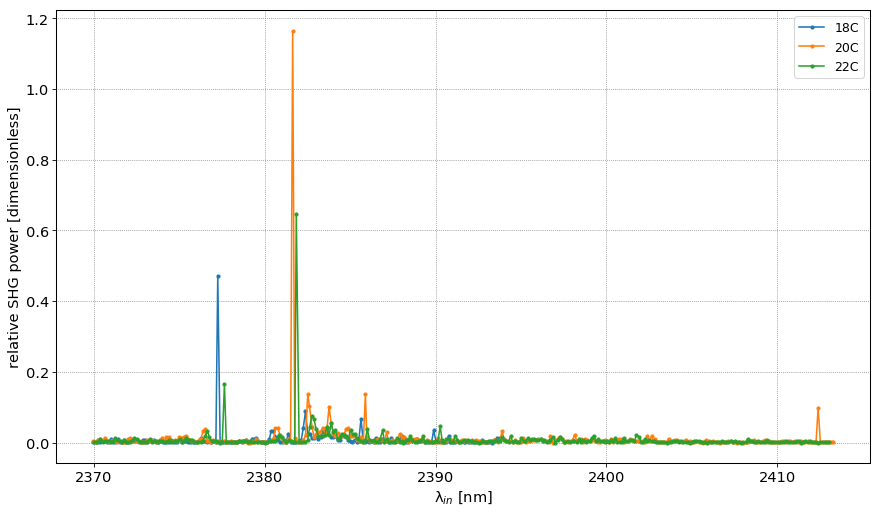

In [6]:
# plot three SHG spectra taken from the same device at three different chip temperatures
d = [ds1_18C,ds1_20C,ds1_22C]
labels = ['18C','20C','22C']

#xlim = [2368,2410]

fig, ax = plt.subplots(1,1,figsize=(14,8))

for dind,ds in enumerate(d):
    V_P_24_trans_rel = ds['V_P_24_trans'] / ds['V_P_24_trans'].max()
    x = ds['lm_meas'][np.nonzero(ds['V_R'])]
    y = ds['V_R'][np.nonzero(ds['V_R'])]/V_P_24_trans_rel[np.nonzero(ds['V_R'])]**2
    ax.plot(x,y,'o-',ms=3,label=labels[dind]) 

    
#ax.set_xlim(xlim)
ax.legend()

ax.set_xlabel('λ$_{in}$ [nm]')
ax.set_ylabel('relative SHG power [dimensionless]')

Text(0,0.5,'relative SHG power [dimensionless]')

C:\Users\Lab\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


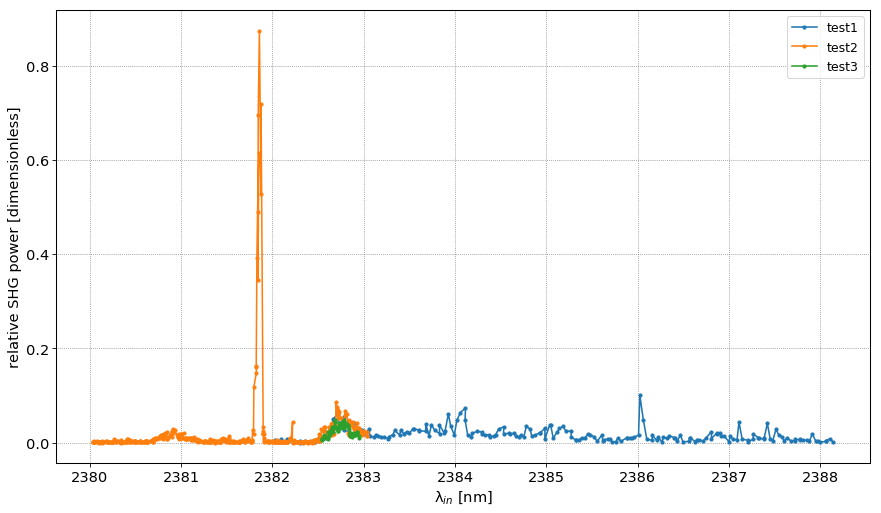

In [31]:
# plot three "test" datasets I took in sequence, all with the sample temp fixed at 22C
d = [ds_test1,ds_test2,ds_test3]
labels = ['test1','test2','test3']

#xlim = [2368,2410]

fig, ax = plt.subplots(1,1,figsize=(14,8))

for dind,ds in enumerate(d):
    V_P_24_trans_rel = ds['V_P_24_trans'] / ds['V_P_24_trans'].max()
    x = ds['lm_meas'][np.nonzero(ds['V_R'])]
    y = ds['V_R'][np.nonzero(ds['V_R'])]/V_P_24_trans_rel[np.nonzero(ds['V_R'])]**2
    ax.plot(x,y,'o-',ms=3,label=labels[dind]) 

    
#ax.set_xlim(xlim)
ax.legend()

ax.set_xlabel('λ$_{in}$ [nm]')
ax.set_ylabel('relative SHG power [dimensionless]')

Text(0,0.5,'relative SHG power [dimensionless]')

C:\Users\Lab\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


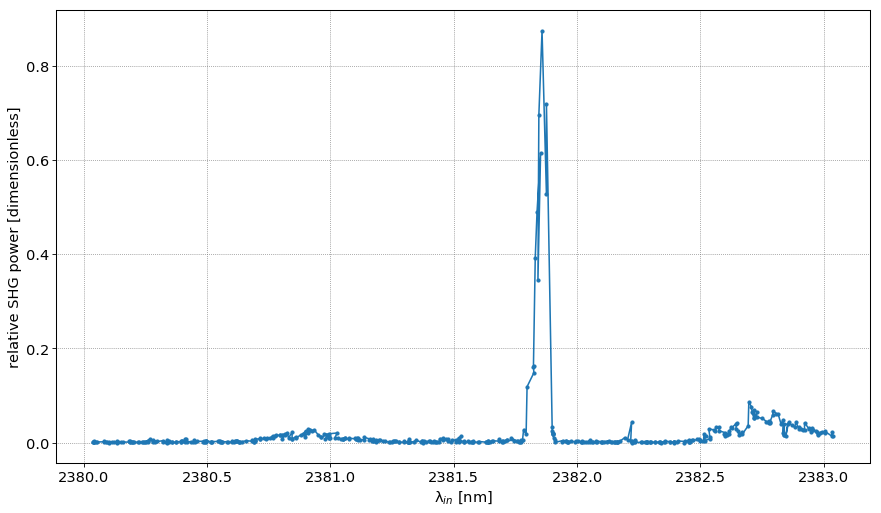

In [32]:
# plot one SHG dataset by itself
ds = ds_test2

fig, ax = plt.subplots(1,1,figsize=(14,8)) 

V_P_24_trans_rel = ds['V_P_24_trans'] / ds['V_P_24_trans'].max()
x = ds['lm_meas'][np.nonzero(ds['V_R'])]
y = ds['V_R'][np.nonzero(ds['V_R'])]/V_P_24_trans_rel[np.nonzero(ds['V_R'])]**2
ax.plot(x,y,'o-',ms=3) 

ax.set_xlabel('λ$_{in}$ [nm]')
ax.set_ylabel('relative SHG power [dimensionless]')   
#ax.set_xlim(xlim)


